<center><b>Ecole Polytechnique, Cycle Ingénieur (2A)<b></center>
<center>MAP471A - Problem solving en mathématiques appliquées</center>
<center>Enseignants : 
    Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(mail)</a> 
    Teddy Pichard	<a href="mailto:teddy.pichard@polytechnique.edu">(mail)</a>
        </center>



# Introduction à l'arrêt optimal

In [3]:
# css style
from IPython.core.display import HTML
def css_styling():
    styles = open("D:\X - 2A - P1\MAP471A\TD06\style/custom2.css").read()
    return HTML(styles)
css_styling()

In [4]:
# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  
import random
%matplotlib inline  

## Table des matières

- [Arrêt optimal pour le dé](#De)
   - [Simulations](#Simus)
- [Parking optimal](#Parking)
- [Problème des secrétaires](#Secretaires)

# Introduction

L'arrêt optimal est le problème que l'on rencontre dans le contexte suivant :
* On dispose de variables aléatoires $X_1,\dots ,X_n,\dots$ dont la loi jointe est connue
* Pour tout $n$ il existe une fonction de gain connue et déterministe $G_n:\mathbb{R}^n\to \mathbb{R}$.
* A chaque $n$, on observe $X_n$ et on doit prendre la décision :
  * d'arrêter et on gagne alors $G_n(X_1,\dots,X_n)$.
  * de continuer.
  
En pratique la plupart des problèmes sont à <b>horizon fini</b> : le processus s'arrête pour un certain $N$ (connu d'avance), et alors on est obligé de s'arrêter et de gagner $G_N(X_1,\dots,X_N)$.

### Temps d'arrêt

Dans ce contexte, le <i>temps d'arrêt</i> $\tau$ associé à une stratégie est la variable aléatoire à valeurs dans $\{1,\dots,N\}$ qui donne l'instant où l'on s'arrête. Par hypothèse on a que pour tout l'événement
$$
\{\tau = n\}
$$
est une fonction de $\{X_1,\dots,X_n\}$ (ça ne peut pas dépendre du futur!).

On cherche le temps d'arrêt qui maximise
$$
\mathbb{E}[G_\tau(X_1,\dots,X_\tau)].
$$

<a id="De"></a>
# Arrêt optimal pour le dé


On considère le problème d'arrêt optimal suivant. Soit $N\geq 1$ fixé, vous avez le droit de lancer un dé équilibré jusqu'à $N$ fois de suite. Lorsque vous décidez de vous arrêter vous gagnez la somme indiquée sur le dé et le jeu s'arrête (si vous avez lancé le dé $N$ fois vous gagnez la valeur du dernier tirage).

On a donc un jeu à horizon fini et
<br><br>
$$
G(x_1,\dots,x_n)=x_n.
$$
<br>
et $X_1,X_2,\dots , X_N$ sont les résultats des $N$ dés, qui sont donc des variables iid uniformes sur $\{1,2,\dots , 6\}$. 

Le but de cette partie est d'implémenter une stratégie particulière (dont on peut montrer qu'elle est optimale) et d'évaluer son efficacité.

Pour une stratégie fixée et un entier $1\leq n\leq N$ on note  $\mathcal{G}(n,N)\in \{1,2,...,6\}$ la variable aléatoire donnée par le gain d'un joueur qui s'apprête à lancer le $n$-ème dé. 
Ce qui nous intéresse est donc  $\mathcal{G}(1,N)$ : le gain du joueur qui commence à jouer.

On pose $g(n,N)=\mathbb{E}[\mathcal{G}(n,N)]$. 

On considère la stratégie suivante :
* Si $n=N$ on doit lancer le dernier dé et on gagne  $\mathcal{G}(N,N)=X_N$, et $g(n,N)=\mathbb{E}[X_N]=\frac{7}{2}$.
* Sinon 
   * si c'est avantageux : $X_n >  g(n+1,N)$ on s'arrête ;
   * si $X_n \leq  g(n+1,N)$ on continue.

On a donc par construction
$$
\mathcal{G}(n,N)= X_n\mathbf{1}_{X_n>g(n+1,N)}+\mathcal{G}(n+1,N)\mathbf{1}_{X_n\leq g(n+1,N)} \qquad (\star)
%\max (X_n,g(n+1,N)).
$$

<div markdown=1 class="Rmk"> 
Cette stratégie est en fait l'application à notre problème particulier de la stratégie appelée <a href="https://fr.wikipedia.org/wiki/Enveloppe_de_Snell">Enveloppe de Snell</a>. On peut effectivement montrer que c'est la stratégie qui maximise l'espérance.

<div markdown=1 class="DoIt"> 

1. Ecrire une fonction `EsperanceMaxDe(v)` qui prend en entrée un réel $v\in [0,6]$ et renvoie
$$
\mathbb{E}[\max (X_1,v)].
$$
(Pour vérifier votre code : vous devez trouver `EsperanceMaxDe(1)=3.5` et `EsperanceMaxDe(4)=4.5`.)

2. En passant à l'espérance dans l'équation $(\star)$, trouver une relation de récurrence entre $g(n,N)$ et $g(n+1,N)$. En utilisant `EsperanceMaxDe()`, coder une fonction `GainOptimal(n,N)` qui calcule $g(n,N)$.<br>
(Pour vérifier votre code : pour tout $N$ on doit trouver $g(N-1,N)=4,25$.)

<div markdown=1 class="Answers"> 

1. 
2. 

In [5]:
def EsperanceMaxDe(valeur):
    # Renvoie l'espérance du max entre un dé uniforme et "valeur"
    D = []
    for k in range(1, 7):
        D.append(max(k,valeur))
    return np.mean(D)

In [6]:
x = EsperanceMaxDe(4)
x

4.5

In [7]:
def GainOptimal(n, N):
    if n == N:
        return 7/2
    return EsperanceMaxDe(GainOptimal(n+1, N))

In [8]:
GainOptimal(1,10)

5.6502176688004875

On souhaite comparer numériquement l'algorithme optimal avec 2 benchmark :

**Algorithme Naïf :**
* Si $X_n=6$ on s'arrête, sinon on relance le dé.

**Oracle :**
* On suppose que l'on connaît à l'avance les résultats $X_1,\dots,X_N$. On s'arrête quand on tombe sur $\max_{1\leq n\leq N} X_n$.



<div markdown=1 class="DoIt"> 

1. Pour l'algorithme naïf et l'oracle, déterminer le gain moyen.<br>
<i>Indication : pour l'oracle, on rappelle que si $M$ est une variable aléatoire entière positive alors</i>
$$
\mathbb{E}[M]=\sum_{k\geq 1}\mathbb{P}(M\geq k)=\sum_{k\geq 1}\bigg(1-\mathbb{P}(M\leq k-1) \bigg).
$$
2. Tracer sur le même graphique les gains pour l'algorithme optimal, l'algorithme naïf et l'oracle pour $n=1,...,N$ avec $N=20$.

<div markdown=1 class="Answers"> 

1. Pour l'algorithme naïf, l'esperance du gain est:
$$
\mathbb{E}[g(n,N)] = 6 \times \mathbf{1}_{X_n = 6} + \mathbb{E}[g(n+1,N)]\times \mathbf{1}_{X_n != 6}
$$

Pour l'oracle, on sait que:
$$
\mathbb{P}(max{X_n} \leq i) = \left( \frac{\lfloor i \rfloor }{6} \right )^N
$$

Alors
$$
\mathbb{E}[g(n,N)] = \sum_{1 \leq i\leq 6}\bigg(1-\mathbb{P}(max{X_n} \leq i-1) \bigg) = \sum_{1 \leq i\leq 6}\bigg(1- \left( \frac{\lfloor i-1 \rfloor }{6} \right )^N\bigg)
$$

In [9]:
def gainNaif(n,N):
    if n==N:
        return 7/2
    else:
        return 6*1/6 + gainNaif(n+1,N)*5/6

In [10]:
gainNaif(1,10)

5.515483251330463

In [11]:
def gainOracle(N):
    E = 0
    for i in range(1,7):
        E += 1 - ((i-1)/6)**N
    return E

In [12]:
gainOracle(20)

5.973614264074476

In [13]:
N = 20

simOpt = [GainOptimal(n,N) for n in range(1,N)]
simNaif = [gainNaif(n,N) for n in range(1,N)]
simOracle = [gainOracle(N-n+1) for n in range(1,N)]

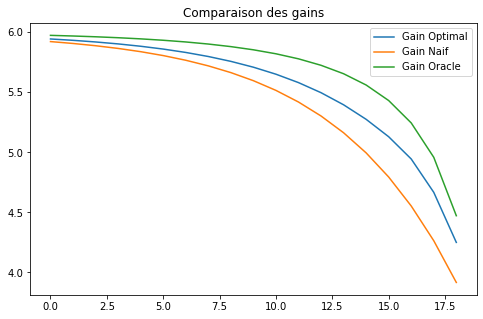

In [14]:
plt.figure(figsize=(8,5))
plt.title(f"Comparaison des gains")

plt.plot(simOpt, 
         label="Gain Optimal"
         )
plt.plot(simNaif,
         label="Gain Naif"
         )
plt.plot(simOracle,
         label="Gain Oracle"
         )
plt.legend()
plt.show()

<div markdown=1 class="DoIt"> 
On considère à nouveau l'algorithme optimal. Tracer pour $N$ fixé la courbe qui donne pour chaque $n\leq N$ le résultat au-dessus duquel il faut arrêter de lancer le dé.

In [15]:
simOpt20 = [GainOptimal(n,20) for n in range(1,21)]
opt20 = np.array(simOpt20).astype(int)+1

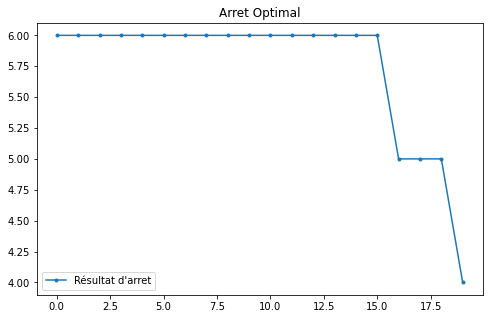

In [19]:
plt.figure(figsize=(8,5))
plt.title(f"Arret Optimal")

plt.plot(opt20, 
         label="Résultat d'arret",
         marker = '.'
         )
plt.legend()
#plt.ylim([1,7])
plt.show()

<a id="Simus"></a>

## Simulations

On souhaite maintenant utiliser des simulations pour afficher des réalisations de la variable aléatoire $\mathcal{G}(0,N)$.

<div markdown=1 class="DoIt"> 

1. Modifier le code précédent pour simuler des réalisations de la variable aléatoire $\mathcal{G}(0,N)$.
2. Afficher le résultat de $1000$ simulations de $\mathcal{G}(0,8)$ dans un histogramme.

<div markdown=1 class="Answers"> 



In [20]:
def simulates(N):
    for n in range(1,N+1):
        dice_n = int(6 * np.random.rand())+1
        if n==N:
            return dice_n
        if dice_n > GainOptimal(n,N):
            return dice_n

In [21]:
simulates(20)

6

In [22]:
n_sim = 1000
sim = []
for i in range(n_sim):
    sim.append(simulates(8))
sim

[3,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 5,
 3,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 2,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 3,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 2,
 6,
 6,
 2,
 6,
 6,
 6,
 2,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 5,
 6,
 6,
 6,
 3,
 6,
 2,
 6,
 5,
 1,
 2,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 2,
 6,
 6,
 6,
 6,
 3,
 3,
 6,
 5,
 6,
 2,
 6,
 6,
 5,
 5,
 6,
 6,
 2,
 6,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 6,
 2,
 6,
 5,
 5,
 6,
 5,
 3,
 6,
 6,
 6,
 6,
 1,
 6,
 6,
 6,
 6,
 2,
 3,
 5,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 5,
 5,
 6,
 6,
 6,
 6,
 2,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 5,
 6,
 6,
 6,
 2,
 6,
 6,
 6,
 6,
 6,
 1,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 5,
 6,
 5,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 3,
 6,
 6,
 6,
 6,
 2,
 5,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,


c:\Users\sabri\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


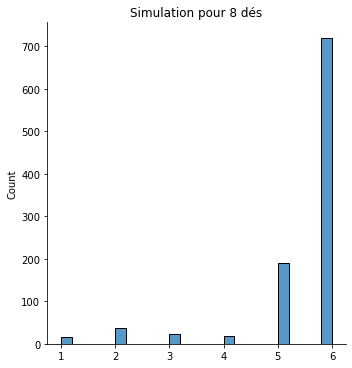

In [23]:
import seaborn as sns

sns.displot(sim).set(title = 'Simulation pour 8 dés')

<a id="Parking"></a>
# Parking optimal

On s'intéresse à un autre problème d'arrêt optimal : le problème du parking sur $\mathbb{N}_*$.

On suppose que les places $\{1,2,3,...\}$ sont occupées indépendamment avec probabilité $p$ par des voitures. Notre objectif est de se garer le plus proche possible de $K$ (un entier fixé et connu) de sorte que le coût pour se garer à la place $i$ est
$$
F(|i-K|),
$$
où $F$ est une fonction croissante positive. 

Le problème est que l'on ne peut observer les places occupées que une à une.
On cherche donc le temps d'arrêt $\tau$ qui minimise
$$
\mathbb{E}[F(|\tau-K|)].
$$
Pour une stratégie fixée et une position $1\leq i $ on note
$$
\mathcal{P}(i,K)
$$
la variable aléatoire donnée par la position à laquelle je vais me garer juste avant d'observer si $i$ est libre ou pas. On note $G(i,K)$ le coût que je vais subir :
\begin{align*}
G(i,K)&=\mathbb{E}\left[F(|\mathcal{P}(i,K)-K|)\right],\\
g(i,K)&=\mathbb{E}\left[G(i,K)\right].
\end{align*}

On considère la stratégie suivante :
* Si $i\geq K$ on se gare dès que possible
* Si $i< K$ on se gare en $i$ si
   * la place est vide
   * <b>ET</b> c'est avantageux : $F(|i-K|) \leq g(i+1,K)$.



<div markdown=1 class="DoIt"> 

1. Pour la stratégie ci-dessus, déterminer $\mathbb{P}(\mathcal{P}(i,K)=j)$ dans le cas $i\geq K$. En déduire $g(K,K)$.
2. Pour $i\geq 1$ on note $Z_i=0$ (resp. $Z_i=1$) si la place $i$ est libre (resp.occupée). Pour $i<K$ écrire une relation de récurrence entre $G(i,K), G(i+1,K), Z_i$ et $g(i+1,K)$.

<div markdown=1 class="Answers"> 
1. 
2. 

<div markdown=1 class="DoIt"> 

1. Ecrire une fonction qui calcule $c(i,K,p)$. (On prendra $F(x)=|x|$.)
2. Pour $K=20$ tracer une courbe qui permette de déterminer à partir de quand doit-on se garer à la première place disponible.

<a id="Secretaires"></a>
# Problème des secrétaires

On modélise maintenant un autre problème d'arrêt optimal.

On considère une suite de variables aléatoires $X_1,\dots , X_N$ i.i.d. de loi inconnue <a href=#Notes>(*)</a>, on observe successivement les $X_i$ et on cherche le temps d'arrêt qui maximise
$$
\mathbb{P}(X_\tau= \max \{X_i\}).
$$

Pour $1\leq k\leq N$ fixé on considère la stratégie suivante :
* On observe $X_1,\dots , X_k$ sans s'arrêter, et on stocke en mémoire la plus grande valeur $M_k=\max_{1\leq i\leq k} \{X_i\}$.
* Ensuite pour $j>k$ on s'arrête dès que $X_j > M_k$. (Si cet événement n'arrive jamais alors on s'arrête en $N$.)

Autrement dit on introduit le temps d'arrêt
$$
\tau(k)=\min \{ j>k, X_j > \max_{1\leq i\leq k} \{X_i\} \},
$$
avec la convention $\min \varnothing = N$.

Voici un schéma qui illustre les notations. A gauche un exemple de succès de la stratégie (on a $X_{\tau(k)}= \max \{X_i\}$) et à droite un échec : 
<center>
    <img src='Figures/PermutationSecretaires.jpg' width=70%>
</center>

Le but est de calculer 
$$
p_N(k)=\mathbb{P}(\text{ La stratégie est gagnante })=\mathbb{P}(X_{\tau(k)}= \max \{X_i\})
$$

<a id="Notes"></a>
(*) On suppose pour simplifier que la loi est à densité, ce qui assure que tous les $Z_i$ sont distincts.


<div markdown=1 class="DoIt"> 

1. Pour $j> k$ calculer $\mathbb{P}(\tau(k) = j ; X_{\tau(k)}= \max \{X_i\})$.
2. En déduire une expression de  $p_N(k)$.
3. Pour différentes valeurs de $N$, tracer $k\mapsto p_N(k)$.

<div markdown=1 class="Answers"> 
1. 
2. 

Sur les courbes de $p_N(k)$ que vous avez obtenues vous devez observer que $p_N(k)$ semble toujours maximale pour $k$ de l'ordre de $c\times N$ où $c$ est une certaine constante dans $(0,1)$. (Pour observer cela le mieux est de tracer $c\mapsto p_N( \lfloor cN\rfloor)$.

<div markdown=1 class="DoIt">
<b>Question théorique.</b> En analysant votre expression de $p_N(k)$ déterminer la valeur du $c$ optimal.

<div markdown=1 class="Answers"> 
